# Car Evaluation Data Set (Dynamic Projects M20 - 22)

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
data=pd.read_csv('car.csv')
data
# Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

#CAR car acceptability
# PRICE overall price
# buying buying price
# maint price of the maintenance
# TECH technical characteristics
# COMFORT comfort
# doors number of doors
# persons capacity in terms of persons to carry
# lug_boot the size of luggage boot
# safety estimated safety of the car

# Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

# The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

# Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.


# Attribute Information:
# CAR(Target): unacc, acc, good, vgood

# Feature Attributes:

# buying: vhigh, high, med, low.
# maint: vhigh, high, med, low.
# doors: 2, 3, 4, 5more.
# persons: 2, 4, more.
# lug_boot: small, med, big.
# safety: low, med, high.


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [53]:
df=pd.DataFrame(data=data)

In [54]:
df.rename(columns={'vhigh':'Buying','vhigh.1':'Maintainance','2':'Doors','2.1':'Persons','small':'Lug_Boot','low':'Safety','unacc':'CAR'},inplace=True)
df.head() ## ReNaming the Column Names

,Buying,Maintainance,Doors,Persons,Lug_Boot,Safety,CAR
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [55]:
df.info() # No Null Values # All object attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1727 non-null   object
 1   Maintainance  1727 non-null   object
 2   Doors         1727 non-null   object
 3   Persons       1727 non-null   object
 4   Lug_Boot      1727 non-null   object
 5   Safety        1727 non-null   object
 6   CAR           1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [56]:
dfc=df.copy()

In [57]:
le=LabelEncoder()
dfc['Buying']=le.fit_transform(dfc['Buying']) # vhigh=3, high=2, med=1, low=0
dfc['Maintainance']=le.fit_transform(dfc['Maintainance']) # vhigh=3, high=2, med=1, low=0
dfc['Doors']=le.fit_transform(dfc['Doors']) # 2=0, 3=1, 4=2, 5more=3.
dfc['Persons']=le.fit_transform(dfc['Persons']) # 2=0, 4=1, more=2.
dfc['Lug_Boot']=le.fit_transform(dfc['Lug_Boot']) # small=2, med=1, big=0.
dfc['Safety']=le.fit_transform(dfc['Safety']) # low=1, med=2, high=0
dfc['CAR']=le.fit_transform(dfc['CAR']) # unacc=2, acc=0, good=1, vgood=3
## Converting all the object datatypes into numerical one

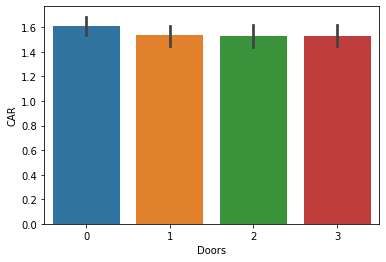

In [58]:
sns.barplot(x='Doors',y='CAR',data=dfc)

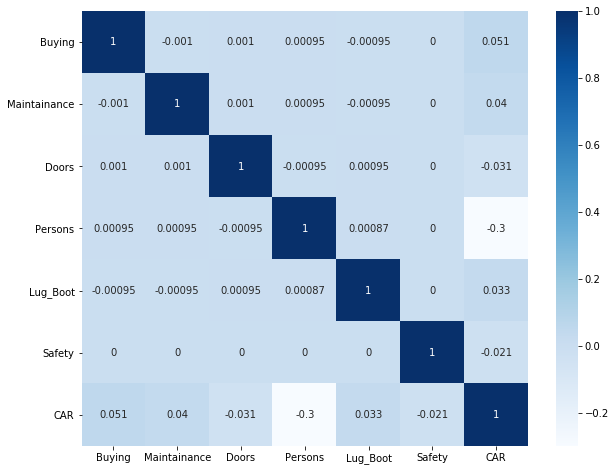

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(dfc.corr(),cmap='Blues',annot=True)

In [60]:
x=dfc.iloc[:,0:-1]
y=dfc.iloc[:,-1]
x.shape,y.shape

((1727, 6), (1727,))

In [61]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.6782273603082851
accuracy score correspondng to random state 42 is: 0.697495183044316
accuracy score correspondng to random state 43 is: 0.697495183044316
accuracy score correspondng to random state 44 is: 0.6647398843930635
accuracy score correspondng to random state 45 is: 0.6801541425818882
accuracy score correspondng to random state 46 is: 0.6647398843930635
accuracy score correspondng to random state 47 is: 0.6628131021194605
accuracy score correspondng to random state 48 is: 0.6859344894026975
accuracy score correspondng to random state 49 is: 0.7071290944123314
accuracy score correspondng to random state 50 is: 0.7129094412331407
accuracy score correspondng to random state 51 is: 0.6801541425818882
accuracy score correspondng to random state 52 is: 0.6859344894026975
accuracy score correspondng to random state 53 is: 0.697495183044316
accuracy score correspondng to random state 54 is: 0.6917148362235067
accuracy score correspo

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.3)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
score=accuracy_score(y_test,pred)
cvs=cross_val_score(lg,x,y,cv=10,scoring='accuracy').mean()
print('accuracy_score:',score)
print(cvs)

accuracy_score: 0.653179190751445
0.6549166554644442


In [64]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

In [65]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    cvs=cross_val_score(i,x,y,cv=10,scoring='accuracy').mean()
    print('accuracy score of',i,'is:',AS)
    print(AS)
    print(confusion_matrix(y_test,Pred))
    print(classification_report(y_test,Pred))
    print(cvs)
    print('\n')

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.976878612716763
0.976878612716763
[[100   3   2   0]
 [  2  21   0   0]
 [  4   1 370   0]
 [  0   0   0  16]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.84      0.91      0.87        23
           2       0.99      0.99      0.99       375
           3       1.00      1.00      1.00        16

    accuracy                           0.98       519
   macro avg       0.94      0.96      0.95       519
weighted avg       0.98      0.98      0.98       519

0.8

So here is the outcome of all algorithms 

In [73]:
d={'accuracy_score':[0.653,0.976,0.890,0.921,0.722],'cross_val_score':[0.654,0.862,0.820,0.736,0.697]}
dr=pd.DataFrame(d,index=['lg','dtc','svc','knn','mnb'])
dr

,accuracy_score,cross_val_score
lg,0.653,0.654
dtc,0.976,0.862
svc,0.890,0.820
knn,0.921,0.736
mnb,0.722,0.697


In [67]:
# so we can see DecisionTreeclassifier is providing best score for the model
# so lets tune the hyper parameters of dtc to get the best possible score 

In [68]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.9692595562683775
{'criterion': 'entropy'}


0.9730250481695568
[[ 99   3   3   0]
 [  2  21   0   0]
 [  5   1 369   0]
 [  0   0   0  16]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.84      0.91      0.87        23
           2       0.99      0.98      0.99       375
           3       1.00      1.00      1.00        16

    accuracy                           0.97       519
   macro avg       0.94      0.96      0.95       519
weighted avg       0.97      0.97      0.97       519

AxesSubplot(0.125,0.125;0.62x0.755)


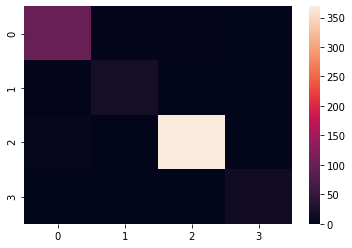

In [69]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(sns.heatmap(confusion_matrix(y_test,pred)))

In [70]:
pred

array([0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2,
       2, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 0, 3, 0, 2, 2, 2, 0, 3, 2, 2, 2,

In [71]:
joblib.dump(dtc,'dtcCAR.obj')

['dtcCAR.obj']